# Letter Recognition

In [1]:
import numpy as np
import pandas as pd

In [2]:
letters = pd.read_csv('letter-recognition.csv')
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
letters.shape

(20000, 17)

In [4]:
letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
letters.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [6]:
letters.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']

letters.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [7]:
order = list(np.sort(letters['letter'].unique()))

print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='letter', ylabel='xbox'>

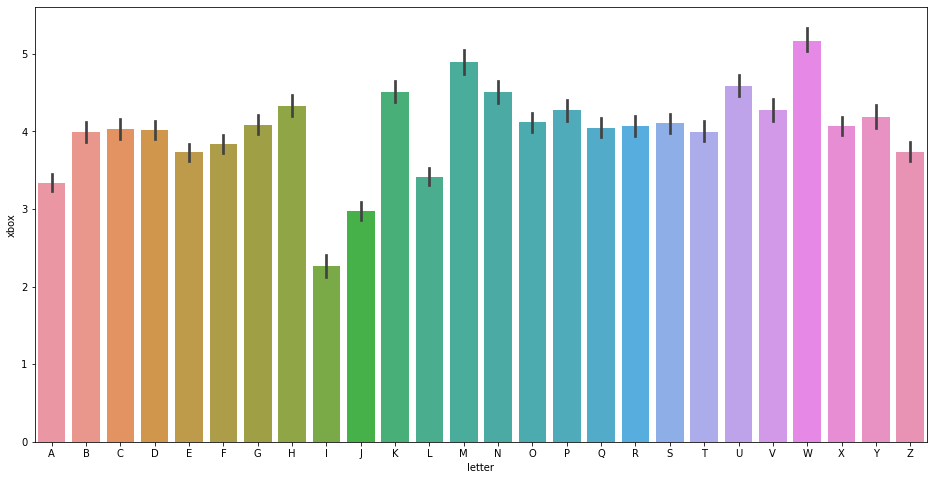

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(x='letter', y='xbox',
           data=letters,
           order=order)

In [10]:
letter_means = letters.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


<AxesSubplot:ylabel='letter'>

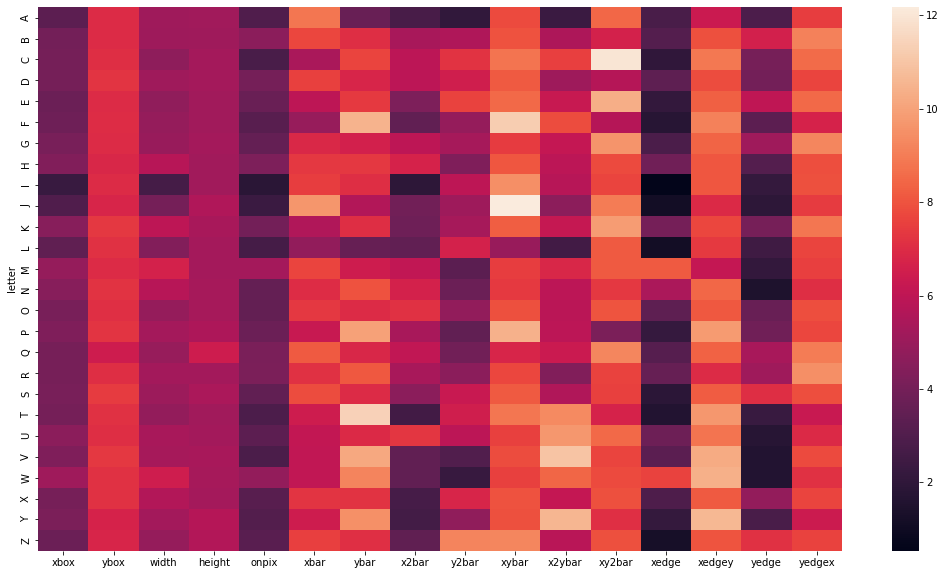

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(letter_means)

In [12]:
round(letters.drop('letter', axis=1).mean(),2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [13]:
x = letters.drop('letter',axis=1)
y = letters['letter']

In [16]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [15]:
scaled = scale(x)

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled, y, test_size=0.3,
                                               random_state=101)

In [18]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
accuracy_score(ytest, ypred)

0.8523333333333334

In [22]:
confusion_matrix(ytest, ypred)

array([[198,   0,   0,   0,   0,   0,   1,   1,   0,   1,   1,   1,   0,
          0,   0,   0,   0,   1,   0,   1,   1,   0,   0,   0,   3,   0],
       [  0, 188,   0,   3,   0,   1,   3,   3,   1,   0,   1,   0,   0,
          2,   0,   1,   1,   9,   3,   0,   0,   1,   0,   1,   0,   0],
       [  1,   0, 200,   0,   7,   0,  12,   1,   0,   0,   5,   0,   0,
          0,   3,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  1,  15,   0, 210,   0,   1,   2,   2,   1,   0,   1,   0,   1,
          5,   3,   0,   0,   5,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   0, 204,   2,   6,   1,   0,   0,   1,   5,   0,
          0,   0,   0,   2,   2,   1,   2,   0,   0,   0,   1,   0,   3],
       [  0,   0,   0,   1,   1, 201,   1,   2,   1,   1,   0,   0,   0,
          2,   0,   2,   0,   0,   3,   7,   1,   0,   1,   0,   1,   0],
       [  0,   1,   9,   4,   2,   2, 167,   1,   0,   1,   4,   3,   1,
          0,   1,   0,   9,   1,   8,   0,   

In [23]:
non_model = SVC(kernel='rbf')

non_model.fit(xtrain, ytrain)

ypred = non_model.predict(xtest)

In [24]:
accuracy_score(ytest, ypred)

0.9383333333333334

In [25]:
confusion_matrix(ytest, ypred)

array([[205,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 205,   0,   3,   1,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   6,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 213,   0,   5,   0,   7,   1,   0,   0,   0,   0,   0,
          0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0, 234,   0,   0,   1,   3,   0,   0,   0,   0,   0,
          3,   1,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 221,   1,   9,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   1,   0, 215,   1,   1,   1,   0,   0,   0,   0,
          1,   0,   1,   0,   0,   1,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   4,   1,   1, 202,   0,   0,   0,   0,   1,   1,
          0,   2,   0,   0,   1,   0,   0,   

In [ ]:
[2	8	3	5	1	8	13	0	6	6	10	8	0	8	0	8]